In [217]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import modes as md
from scipy.optimize import fsolve
from scipy.constants import e as qe
plt.rcParams.update({'font.size': 14})

### Opto-Electronics

In [260]:
pa_angle = 50e-6
nut_amp = 1e-6 / pa_angle
NEA = 1e-6 / pa_angle

bandwidth = 50         # Hz
responsivity = 0.6     # A/W
amp_noise = 600e-9     # V/rtHz, TIA at 21Mohm
transimpedance = 21e6  # Ohms

shot_factor = 2*qe*bandwidth*responsivity*transimpedance**2
amp_noise_pwr = bandwidth*amp_noise**2

def power_needed(slope):
    root_func = lambda pwr: pwr-np.sqrt(amp_noise_pwr+shot_factor*pwr)/(responsivity*transimpedance*nut_amp*NEA*slope)
    return fsolve(root_func, 1)[0]
    
def powers(slopes):
    return np.array(list(map(power_needed, slopes)))

### 780nm/980nm ZK3M collimator

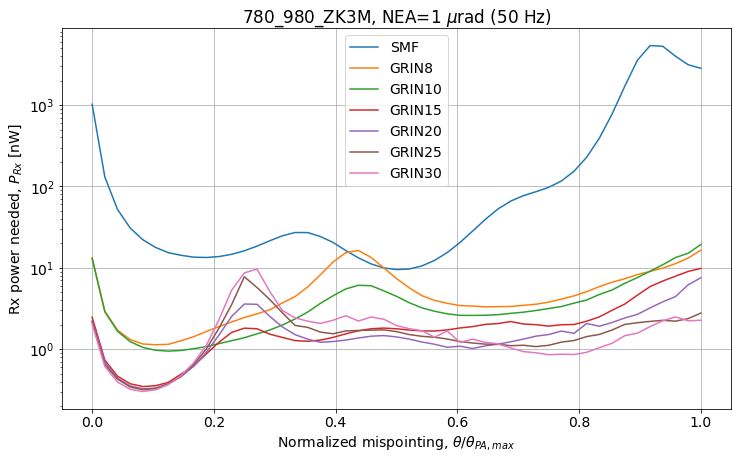

In [262]:
rs = np.linspace(0, 1, 50)
rds = np.linspace(0, 1, 49)
folder = '780_980_ZK3M'

def im_plot(name):
    im = np.load('%s/res_%s.npy' % (folder, name))
    dy = np.abs((im[1,1:]-im[1,:-1])/(rs[1:]-rs[:-1]))
#     rms = np.sqrt(np.mean(dy**2))
#     plt.plot(rs, im[1,:], label=name)
#     plt.plot(rds, dy, label=name.upper())
    plt.plot(rds, 1e9*powers(dy), label=name.upper())
    
plt.figure(figsize=(12,7))
plt.grid()

im_plot('smf')
# im_plot('grin')
# im_plot('grin6.5')
im_plot('grin8')
im_plot('grin10')
# im_plot('grin12.5')
im_plot('grin15')
im_plot('grin20')
im_plot('grin25')
im_plot('grin30')


plt.yscale('log')
plt.ylabel('Rx power needed, $P_{Rx}$ [nW]')
plt.xlabel('Normalized mispointing, $\\theta/\\theta_{PA,max}$')
plt.legend()
plt.title('%s, NEA=1 $\mu$rad (%d Hz)' % (folder,bandwidth));

### 780nm/980nm achromatic collimator

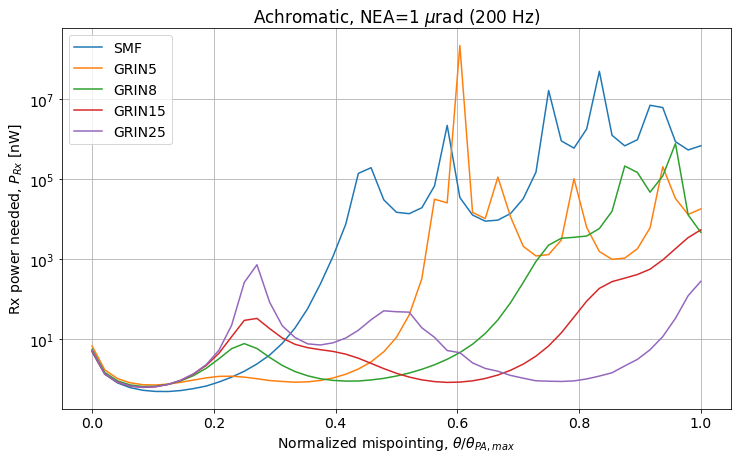

In [246]:
folder = 'Achromatic'
plt.figure(figsize=(12,7))
plt.grid()

im_plot('smf')
im_plot('grin5')
im_plot('grin8')
im_plot('grin15')
im_plot('grin25')

plt.yscale('log')
plt.ylabel('Rx power needed, $P_{Rx}$ [nW]')
plt.xlabel('Normalized mispointing, $\\theta/\\theta_{PA,max}$')
plt.legend()
plt.title('%s, NEA=1 $\mu$rad (%d Hz)' % (folder,bandwidth));

### 1537/1565 nm NPH3 collimator

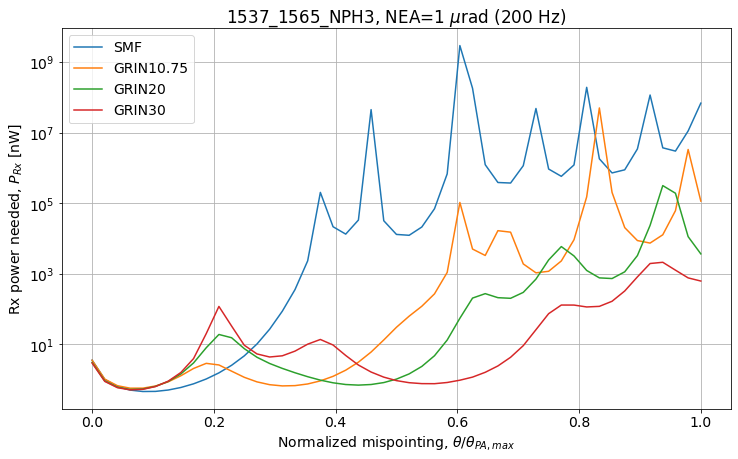

In [247]:
folder = '1537_1565_NPH3'
plt.figure(figsize=(12,7))
plt.grid()

im_plot('smf')
im_plot('grin10.75')
im_plot('grin20')
im_plot('grin30')

plt.yscale('log')
plt.ylabel('Rx power needed, $P_{Rx}$ [nW]')
plt.xlabel('Normalized mispointing, $\\theta/\\theta_{PA,max}$')
plt.legend()
plt.title('%s, NEA=1 $\mu$rad (%d Hz)' % (folder,bandwidth));

### 780nm/980nm N-SF57 collimator

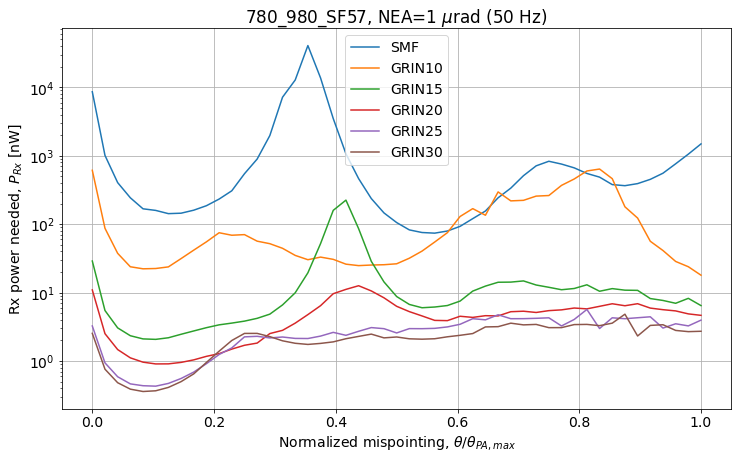

In [263]:
folder = '780_980_SF57'
plt.figure(figsize=(12,7))
plt.grid()

im_plot('smf')
# im_plot('grin5')
im_plot('grin10')
im_plot('grin15')
im_plot('grin20')
im_plot('grin25')
im_plot('grin30')

plt.yscale('log')
plt.ylabel('Rx power needed, $P_{Rx}$ [nW]')
plt.xlabel('Normalized mispointing, $\\theta/\\theta_{PA,max}$')
plt.legend()
plt.title('%s, NEA=1 $\mu$rad (%d Hz)' % (folder,bandwidth));